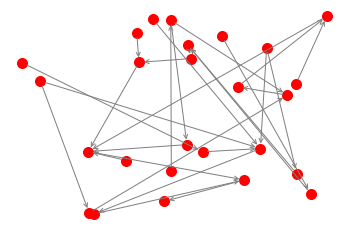

In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('../dataset/json2networkx/nusmv.syncarb5^2.B_0.json') as f:
    json_data = json.loads(f.read())

#G = nx.DiGraph()
G = nx.MultiDiGraph()

G.add_nodes_from(
    elem['data']['id']
    for elem in json_data
)

edge_list = []

for elem in json_data: 
    if elem['data']['type']=='node':
        edge_list.extend((elem['data']['id'], child_id) for child_id in elem['data']['to']['children_id'])

G.add_edges_from(
    edge_list
)

# nx.draw(
#     G,
#     with_labels=True
# )

pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

# for elem in json_data: 
#     if elem['data']['type']=='node' :
#         print(elem['data']['to']['children_id'])

# for elem in json_data: 
#     if elem['data']['type']=='node' :
#         for child_id in elem['data']['to']['children_id']:
#             print((elem['data']['id'], child_id)) 


A=np.array(nx.to_numpy_matrix(G))

# Get G egdes to dataframe
edge_df = nx.to_pandas_edgelist(G) 

# Transform networkx nodes to dataframe
nodelist = list(G.nodes(data=True)) # From G to list
node_df = pd.DataFrame(nodelist, columns=['vertex', 'name_attribute']) # From list to DF

